In [21]:
# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import random as r 

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [22]:
# Twitter API Keys
consumer_key = "c8iPOfqAcm1qys97q3RW0wKOM"
consumer_secret = "6sUoqS7FtJkIKTfdoWaZHEf5quOEeqAfrJLsSJMzJd2Aw1myoF"
access_token = "229598666-EnGXtgqnFXT8zjHrMTI7medln9PlPdT5thbQhjJh"
access_token_secret = "Bdr3ujJgJqgf6wksE2b8OQ7CxkFTCAi5KolqLZrc9giNH"

In [23]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [24]:
# Target User Accounts
target_user = ('@BBC', '@CBS', '@CNN', '@Fox', '@New York times')
#target_user = ('@CNN')

In [25]:
# A list to hold tweet timestamps
tweet_times = []
user_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
time_list = []
    
# Loop through each user
for user in target_user:
    
    # Loop through 10 pages of tweets (total 200 tweets)
    for x in range(5):
        public_tweets = api.user_timeline(user)
        
        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            # Add each value to the appropriate array
            user_list.append(user)
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

# Adding all the tweets into an Array

news_data = pd.DataFrame({'Agency Name ': user_list, 'Compound': compound_list,'Positive': positive_list,
                            'Neutral':neutral_list,'Negative':negative_list})


In [29]:
news_data

,Agency Name,Compound,Negative,Neutral,Positive
0,@BBC,0.6369,0.000,0.769,0.231
1,@BBC,0.1531,0.194,0.631,0.175
2,@BBC,0.0258,0.000,0.948,0.052
3,@BBC,0.0000,0.000,1.000,0.000
4,@BBC,0.0000,0.000,1.000,0.000
5,@BBC,0.7964,0.000,0.747,0.253
6,@BBC,0.0000,0.000,1.000,0.000
7,@BBC,0.7964,0.000,0.738,0.262
8,@BBC,0.5719,0.000,0.810,0.190
9,@BBC,0.8074,0.000,0.711,0.289


In [26]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
Agency Name     500 non-null object
Compound        500 non-null float64
Negative        500 non-null float64
Neutral         500 non-null float64
Positive        500 non-null float64
dtypes: float64(4), object(1)
memory usage: 19.6+ KB


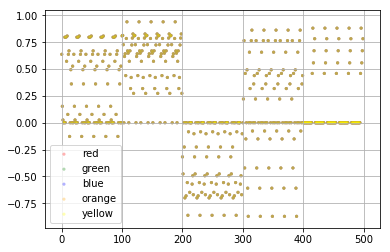

In [27]:
fig, ax = plt.subplots()
for color in ['red', 'green', 'blue','orange','yellow']:
    
    x = news_data.index
    y = news_data['Compound']
    scale = 10.0 
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

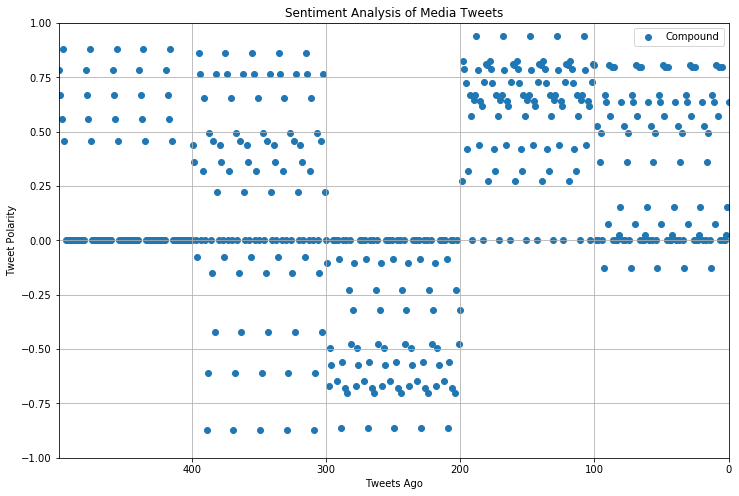

In [28]:
compound = news_data.index

plt.figure(figsize=(12,8))
plt.scatter(compound, news_data['Compound'], marker ='o')
plt.gca().set(xlabel = 'Tweets Ago', ylabel = 'Tweet Polarity',title = 'Sentiment Analysis of Media Tweets',xlim = (max(compound),0), ylim = (-1,1))
plt.legend(loc = 'best', frameon=True)
plt.grid()
plt.show()